# Predicting home prices with the k-NN algorithm
Given a record containing features of a house, we want to be able to predict its price. We use the dataset ''House Sales in King County, USA'', downloaded from kaggle. We want to predict a price of a home based on the homes that are closests to it, i.e. have similar properties.

Download the data file [housing.csv](https://drive.google.com/file/d/1s_muxczF8K4qs5mIohZItlb0b6jA4Rhc/view?usp=sharing) to your local directory.<br>
Update the variable `file_name` in the cell below to point to your local directory where you store the datasets for this course and then run the cell.

In [1]:
import os
for list_of_files in os.listdir("../data_sets"):
	print(list_of_files)

contact_lenses.csv
covid_categorical_good.csv
housing.csv
pizza_delivery_locations.csv
StudentEvaluations.csv
titanic.csv
two_houses.csv


In [2]:
file_name = "../data_sets/housing.csv"

# Part I. Predicting home price
### 1.1. Features are numeric

We have the following features:
<ul>
    <li>id - house identifier, numeric.</li>
    <li>price - house price, numeric. <b>This is the target variable that we are trying to predict</b>.</li>
    <li>bedrooms - no. of bedrooms, numeric.</li>
    <li>bathrooms - no. of bathrooms, numeric.</li>
    <li>sqft_living - square footage of the home, numeric.</li>
    <li>sqft_lot - square footage of the lot, numeric.</li>
    <li>floors - no.of floors, numeric.</li>
    <li>waterfront - boolean (expressed as 0 or 1).</li>
    <li>condition - the amount of wear-and-tear, numeric (from 0 to 5).</li>
    <li>sqft_above - square footage of house apart from basement, numeric.</li>
    <li>sqft_basement - square footage of the basement, numeric.</li>
    <li>age - number of years since year built to year sold, numeric.</li>
</ul>
<br>
Read the file into pandas dataframe:

In [3]:
import pandas as pd
import numpy as np

# this creates a pandas.DataFrame
data = pd.read_csv(file_name, index_col='id')
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'sqft_above', 'sqft_basement', 'age'],
      dtype='object')

<AxesSubplot:>

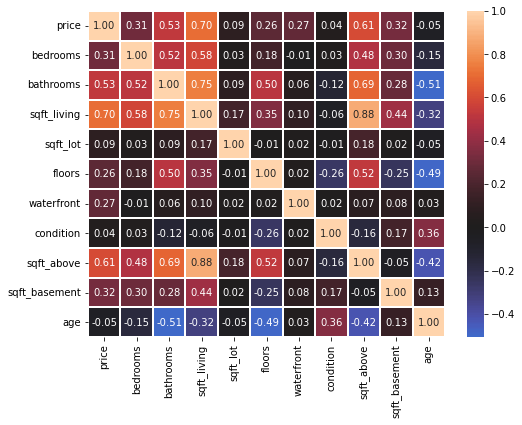

In [4]:
# Is there any correlation between features?
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(8,6)) 
corr = data.corr()
sns.heatmap(corr, center=0, annot=True, linewidths=.1, ax=ax, fmt='.2f')

### 1.2. The target is numeric
We want to build the model that *predicts* house prices: we look into `sklearn.neighbors` [library](https://scikit-learn.org/stable/modules/neighbors.html). There are several modules in this library. Which one do you think we need to use in order to predict prices?

In [5]:
# split data into features and target variable
X = data.drop(columns=['price' ])
Y = data['price'].values

In order to split the dataset into train and test parts we can use `train_test_split` method from `sklearn.model_selection` module. We set the test set size to be 20% of the entire dataset. This way of splitting the data into train and test sets is called **holdout estimation**: we are holding out part of the data to see how the predictor performs on data that it has never seen.

In [6]:
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #Taking 20% to test and 80%to model

We now buid our model. What do you think happens when we call `knn.fit`? What operations are performed by the algorithm? 

Explore all different algorithms [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms).

# Task 1. Question

Does the the use of a different algorithm make the model itself different? What is the difference between the algorithms?

What does the `weight` parameter specify?

Answer:
According to the documentation of the Scikit Learn, "weight" is the value assigned to a query point where is computed from a simple majority vote of the nearest neighbors. 

In [7]:
#Nearest Neighbors Regression
#Split the dataset into train and test

In [8]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [9]:
# train set score
knn.score(X_train, Y_train) #Determining the score with the training data (Always very good)

0.7360297546423995

In [10]:
# test set score
knn.score(X_test, Y_test) 

0.4708198433336952

I tried all the imaginable improvements and was unable to get the test accuracy above $0.60$.

In [11]:
#Not a good score, the higher the better.
#Predicting the class is much easier that then predicting the score...

# Part II. Predicting Home Category
It does not seem that we can reliably predict the numeric home price using the data and the `KNeighborsRegressor`.

Instead we are going to use `KNeighborsClassifier` to predict a class label of each home.

# Task 2. Converting target variable into a class label
Convert the numeric price attribute into the binary class as follows: "price above mean" (class 1) and "price below mean" (class 0).

In [12]:
#In order to get some reasonable classyfication.


In [13]:
# converting target attribute to a class label
# <Your code here>
data['class'] = 1*(data['price'] > data['price'].mean())

#Find out the mean....
data['price'].mean()

540182.1587933188

To make sure that both classes are represented properly, find out how many total houses are above mean and how many are below mean.

In [14]:
# How many houses belong to class 0 and to class 1?
data['class'].value_counts()

0    13694
1     7919
Name: class, dtype: int64

In [15]:
data.shape

(21613, 12)

Here are my results for comparison:

mean price: 540182.1587933188

Total: 21613

Below: 13694

# Task 3. Baseline experiment

Repeat the same steps as in 1.2. using transformed dataset and `KNeighborsClassifier`.

In [16]:
# we repeat the same steps but with a categorical class label
# split data into features and target variable
X = data.drop(columns=['price', 'class'])
Y = data['class'].values

# split dataset into train and test sets

from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) #Taking 20% to test and 80%to model


In [17]:
# we use a clasifier instead of regressor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=3)

In [18]:
print("Baseline train score:", knn.score(X_train, Y_train))
print("Baseline test score:", knn.score(X_test, Y_test))

Baseline train score: 0.8607865818392134
Baseline test score: 0.7712236872542216


Here are some results for comparison:

Baseline train score: 0.8657027183342972

Baseline test score: 0.7594263243118204

# Task 4. Normalizing numeric attributes
The k-Nearest Neighbor classifier uses distance to find $K$ nearest neighbors. Distance metric is very sensitive to the scale of numeric attributes. For example, the *sqft_living* is represented as three- to four-digit numbers, and the numer of *bedrooms* is in single digits. Thus the distance across *sqft_living* would dominate the distance across the *bedrooms* dimension. To avoid this scale-related bias, we need to project all numeric values into interval from 0 to 1. 

Perform data normalization in the cell below.

In [19]:
# normalizing numeric fields
# You can write a simple loop over all columns in data
# You can use pandas or numpy
# Use np.min and np.max
# Alternatively you can use sklearn.preprocessing.MinMaxScaler()
# <Your code here>

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

#X_train_scaled = sc.fit_transform(X_train)
#X_test_scaled = sc.transform(X_test)
X_scaled = X.copy()
X_scaled[:] = sc.fit_transform(X)

#Subtract min and divide by maxscale


In [20]:
X_scaled

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,age
id,,,,,,,,,,
7129300520,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.5,0.097588,0.000000,0.517241
6414100192,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.5,0.206140,0.082988,0.551724
5631500400,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.5,0.052632,0.000000,0.715517
2487200875,0.121212,0.37500,0.126038,0.002714,0.0,0.0,1.0,0.083333,0.188797,0.431034
1954400510,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.5,0.152412,0.000000,0.250000
...,...,...,...,...,...,...,...,...,...,...
263000018,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.5,0.135965,0.000000,0.051724
6600060120,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.5,0.221491,0.000000,0.017241
1523300141,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.5,0.080044,0.000000,0.051724


Repeat the same experiment as in Task 3, but with normalized data. Did your model improve?

In [21]:
# we repeat the same steps but with normalized data


# split data into features and target variable
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2)

#split dataset into train and test data

# Build a classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, Y_train)

print("Normalized train score:", knn.score(X_train_scaled, Y_train))
print("Normalized test score:", knn.score(X_test_scaled, Y_test))

Normalized train score: 0.8724696356275303
Normalized test score: 0.7788572750404812


Here are my results:

Normalized train score: 0.8728744939271255

Normalized test score: 0.7777006708304418

# Task 5. Adding expert knowledge
Now that we removed the scale bias of each feature by projecting all of them into the same interval $[0,1]$, we want to introduce some bias based on the expert knowledge. 

Look at the correlation map. Which attributes are highly correlated with price? How can we make them contribute more to the overall distance between the houses?

<AxesSubplot:>

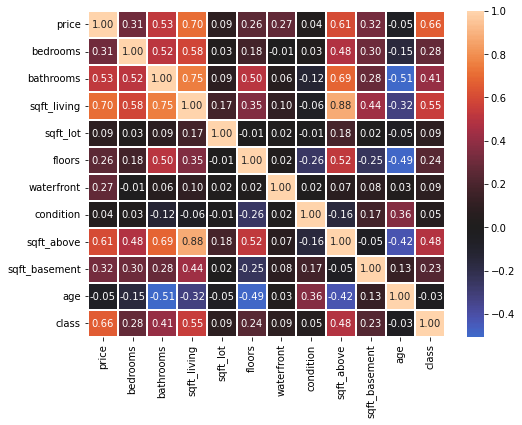

In [22]:
fig, ax = plt.subplots(figsize=(8,6)) 
corr = data.corr()
sns.heatmap(corr, center=0, annot=True, linewidths=.1, ax=ax, fmt='.2f')

In [23]:
# increase influence of distances across important attributes
#Let's say the square ft living is much more important of the age. How to weight the distance?
#If we want have sqft to influcen and define your neighbor, Should we multply by a big or small number? between 0 or 1.

Repeat the same experiment but with added bias. Did you get better results?

In [24]:
# we repeat the same steps but with added bias
# split data into features and target variable

X_scaled_bias = X_scaled.copy()
X_scaled_bias[['sqft_living', 'sqft_above']] = X_scaled_bias[['sqft_living', 'sqft_above']]*.01

#split dataset into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2)


# Build the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

print("Expert train score:", knn.score(X_train, Y_train))
print("Expert test score:", knn.score(X_test, Y_test))

Expert train score: 0.876576055523424
Expert test score: 0.7702984038861902


I got more than 78% accuracy for the testing score.

# Task 6. Neighbor voting
Look closely at the `weights` parameter of the `KNeighborsClassifier`. How can we make the nearer neighbors contribute more to the decision about the class? 

Run the same experiment as in Task 5 but with weighted distance from the neighbors. Did you get better results?

In [25]:
#Here we combine...
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, Y_train)


print("Weighted distance train score:", knn.score(X_train, Y_train))
print("Weighted distance score:", knn.score(X_test, Y_test))

Weighted distance train score: 0.9997108155002892
Weighted distance score: 0.7698357622021744


Answer: By including weight as distance, we still do not get much improvement if compared to task 5.

# Task 7. More reliable score with cross-validation

To produce a more reliable estimation of the model performance we are going to use **cross-validation** instead of holdout estimation. 

Cross-validation is when the dataset is randomly split up into $m$ groups (called $folds$). One of the groups is used as the test set and the rest are used as the training set. The model is trained on the training set and scored on the test set. Then the process is repeated until each unique group has been used as the test set. For example, for 5-fold cross validation, the dataset would be split into 5 groups, and the model would be trained and tested 5 separate times so each group would get a chance to be the test set. 

Cross-validation is more reliable than the holdout method because the holdout method score is dependent on how the data is split into train and test sets. Cross-validation gives the model an opportunity to test on multiple splits so we can get a better idea on how the model will perform on unseen data.

Repeat the experiment from Task 6, but using the entire sets X and Y, and 10-fold cross-validation. You can use `sklearn.model_selection.cross_val_score` to compute the scores for each fold: [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

You should print all the scores and report the mean. Notice how the score for each fold is slightly different. The cross-validation helps to make model validation more reliable.

In [26]:
#Cross validation...
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3, weights='distance')

# train model with cv of 10 
cv_scores = cross_val_score(knn_cv, X_scaled, Y, cv=10) #Ten equal subsets.. to train each time in 9 subsets to predict 1 10th..

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.77983349 0.77289547 0.76456984 0.76399815 0.76584914 0.77232763
 0.77047663 0.7653864  0.76122166 0.7445627 ]
cv_scores mean:0.7661121101898468


# Task 8. Finding the best value of $K$
As explained in the lecture, the best value of $K$ can be found using cross-validation. If $K$ is small, then it might be not enough information from the neighbors to correctly predict the target variable. If the number of neighbors is too big, then the prediction will incorporate noise (overfitting).

We are going to run our classification with different values of $K$, to determine the best value that produces the highest score for the test data. 

Conduct a series of experiments varying $K$ from 1 to 35 (or more if the score keeprs improving), and for each experiment perform 20-fold cross-validation. For this we can use `sklearn.model_selection.GridSearchCV`: [link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 

In a nutshell, you create a new knn classifier, without specifying the value of $K$. You also create a parameter `grid_dictionary`, where the key is `n_neighbors` and the value is `np.range(1,35)`.
Then you call the `GridSearchCV` passing as parameters the knn classifier, parameter grid, and `cv`-the number of folds for cross-validation. 

Finally, you fit the data, and wait until all the experiments are finished.

In [27]:
from sklearn.model_selection import GridSearchCV
#no need to implement myself...
#use n_neigbors... break into 20 folds.
#create new a knn model
new_knn = KNeighborsClassifier(weights='distance')

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'n_neighbors': np.arange(1,35)} #Suggested range... continue until it drops.. and choose the best neighbors


#use gridsearch to test all values for n_neighbors
grid = GridSearchCV(new_knn, grid_dictionary, cv=20)

#fit model to data
grid.fit( X, Y)


GridSearchCV(cv=20, estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])})

What is the best value of $K$? We can find out by looking into `best_params_` field of the `GridSearchCV` object.

In [28]:
# check top-performing n_neighbors value
grid.best_params_, grid.best_score_

({'n_neighbors': 34}, 0.7862883304210777)

# Task 9. Final experiment
Repeat the final cross-validation experiment with the best value of $K$ determined in Task 8, and compute the mean of the cross-validation score for our final model (cv=20).

In [29]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=17, weights='distance')


# train model with cv of 20 
cv_scores = cross_val_score(knn_cv, X, Y, cv=34) #Ten equal subsets.. to train each time in 9 subsets to predict 1 10th..


#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))



[0.78144654 0.79559748 0.77201258 0.77201258 0.78144654 0.77201258
 0.77201258 0.77515723 0.74213836 0.78301887 0.80188679 0.77515723
 0.77987421 0.77830189 0.78773585 0.78616352 0.76415094 0.77672956
 0.78144654 0.78773585 0.77987421 0.79559748 0.8081761  0.79055118
 0.77637795 0.77007874 0.78582677 0.76220472 0.78897638 0.77795276
 0.82204724 0.78740157 0.81102362 0.79370079]
cv_scores mean:0.7828184490257253


If you performed all the improvements correctly, the mean cross-validation score should be at least $0.80$. This is already a somewhat useful model. Given a new house, you can feed its features into the model, and find out if it is a cheap or an expensive house - i.e. if it is priced above the mean price in the current area or below it.

Of course you are welcome to improve the model even further for additional bonus points.

# Task 10. Predicting class of two new houses
We have two new houses for sale. The data about them is in file two_houses.csv, included in this repository.

We can build the model using the entire dataset (X, Y).

We want to predict the class label of these two houses. 

Do not forget to perform the same transformations on the new data as you performed on the original dataset.

In [30]:
knn_full = KNeighborsClassifier(n_neighbors=31, weights='distance')
knn_full.fit(X, Y)

KNeighborsClassifier(n_neighbors=31, weights='distance')

In [31]:
test_file_name = "../data_sets/two_houses.csv"

test = pd.read_csv(test_file_name, index_col='id')
test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,age
id,,,,,,,,,,,
2422049104,85000.0,2,1,830,9000,1,0,3,830,0,75
7558700030,5300000.0,6,6,7390,24829,2,1,4,5000,2390,24


In [32]:
#Test-data transformation
x_test = test.drop(columns='price')
# x_test_scaled = sc.transform(x_test)
y_test = 1*(test['price'] > data['price'].mean())

In [33]:
y_predicted = knn_full.predict(x_test)
print("Predicted price:",y_predicted)
print("Actual price:",y_test)

Predicted price: [0 1]
Actual price: id
2422049104    0
7558700030    1
Name: price, dtype: int32


This is the end of the KNN lab.

Copyright &copy; 2022 Marina Barsky. All rights reserved.
